In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics

#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import f1_score
#from sklearn.preprocessing import PowerTransformer
#from sklearn.preprocessing import MinMaxScaler
#import matplotlib.pyplot as plt
#from scipy import optimize

In [2]:
class ngram:
    '''
    Crystal graph representation which converts 
    crystalline structures into features by counting
    the contiguous sequences of unique atomic sites of
    various lengths.
    '''
    def __init__(self):
        pass
    
    def fit(xyz, species_vector, method, **kvargs):
        pass
    
    def summary():
        pass
    
    def output():
        pass
    
    def plot():
        pass
    
    

In [3]:
lattice_vector_relaxation = pd.read_csv("/home/jurka/research-project/train/relaxation/lattice_vector_relaxation.csv")
lattice_vector_relaxation.head()

,id,relaxation_step_number,lattice_vector_1_x,lattice_vector_1_y,lattice_vector_1_z,lattice_vector_2_x,lattice_vector_2_y,lattice_vector_2_z,lattice_vector_3_x,lattice_vector_3_y,lattice_vector_3_z
0,1,0,9.948758,-0.023988,-0.012877,0.020066,8.567744,-0.038975,0.014275,-0.000454,9.176459
1,2,1,6.211404,0.012048,-0.004714,-3.122471,5.374716,0.013662,0.049339,-0.048739,23.578503
2,2,2,6.194021,-0.004324,-0.000077,-3.134810,5.355264,0.008039,0.062361,-0.044105,23.662913
3,2,3,6.200970,0.002719,-0.005367,-3.131943,5.360881,0.010332,0.054188,-0.045885,23.619045
4,2,4,6.199972,0.002654,-0.005894,-3.130494,5.360724,0.010812,0.053680,-0.046549,23.627167


In [4]:
atoms_frac_xyz_relaxation = pd.read_csv("/home/jurka/research-project/train/relaxation/atoms_frac_xyz_relaxation.csv")
atoms_frac_xyz_relaxation.head()

,id,relaxation_step_number,species,L1,L2,L3
0,1,0,Ga,0.161225,0.846772,0.693017
1,1,0,Al,0.663710,0.847596,0.695078
2,1,0,Al,0.339848,0.151440,0.193321
3,1,0,Ga,0.834528,0.154660,0.196096
4,1,0,Ga,0.090465,0.349773,0.193898


In [5]:
atoms_xyz_relaxation = pd.read_csv("/home/jurka/research-project/train/relaxation/atoms_xyz_relaxation.csv")
atoms_xyz_relaxation.head()

,id,relaxation_step_number,species,x [A],y [A],z [A]
0,1,0,Ga,1.630872,7.250740,6.324361
1,1,0,Al,6.630021,7.245745,6.336774
2,1,0,Al,3.386863,1.289255,1.763723
3,1,0,Ga,8.308420,1.304978,1.782694
4,1,0,Ga,0.909800,2.994510,1.764503


In [6]:
def lattmat(df,ajdi,relaxation_step_number):
    """Create a numpy matrix of lattice vectors. A column = a vector.
    
    Keyword arguments:
    df -- dataframe of the lattice vectors
    ajdi -- id of the material
    relaxation_step_number -- self explanatory
    """
    return np.transpose(df.loc[(df["id"]==ajdi) & (df["relaxation_step_number"]==relaxation_step_number)].loc[:,["lattice_vector_1_x" ,"lattice_vector_1_y" ,"lattice_vector_1_z" ,"lattice_vector_2_x" ,"lattice_vector_2_y" ,"lattice_vector_2_z" ,"lattice_vector_3_x" ,"lattice_vector_3_y", "lattice_vector_3_z"]].to_numpy().reshape(3,3))

In [7]:
lattmat(lattice_vector_relaxation,1,0)

array([[ 9.94875826e+00,  2.00657400e-02,  1.42749700e-02],
       [-2.39884700e-02,  8.56774383e+00, -4.54460000e-04],
       [-1.28773300e-02, -3.89754800e-02,  9.17645875e+00]])

In [8]:
def posvecs(df,ajdi,relaxation_step_number):
    """Create a numpy array of vectors of position of the atoms of the material with the given id and relaxation_step_number.
    
    Keyword arguments:
    df -- dataframe of xyz coordinates of atoms
    ajdi -- id of the material
    relaxation_step_number -- self explanatory
    """
    return df.loc[(df["id"]==ajdi) & (df["relaxation_step_number"]==relaxation_step_number)].loc[:,["x [A]" ,"y [A]" ,"z [A]"]].to_numpy()

In [9]:
posvecs(atoms_xyz_relaxation,2,3)

array([[ 2.04960900e-02, -1.56686200e-02,  5.87946123e+00],
       [ 3.24834700e-02, -3.81459900e-02,  1.77154234e+01],
       [ 4.63714316e+00,  2.67908300e+00,  5.87298017e+00],
       [ 4.67165752e+00,  2.64140114e+00,  1.77220051e+01],
       [ 3.09976256e+00, -1.18017300e-02,  5.87057140e+00],
       [ 3.14533457e+00, -3.39056100e-02,  1.77108309e+01],
       [ 1.55948232e+00,  2.68850599e+00,  5.89501533e+00],
       [ 1.58356272e+00,  2.66107316e+00,  1.77133849e+01],
       [ 3.91445000e-03, -3.41036000e-03, -4.41836100e-02],
       [ 2.24836000e-02, -1.35959000e-02,  1.18639783e+01],
       [ 4.62344194e+00,  2.68236906e+00, -4.95484300e-02],
       [ 4.66316260e+00,  2.65106717e+00,  1.18614866e+01],
       [ 3.10391473e+00,  5.08281000e-03, -5.05319100e-02],
       [ 3.13448178e+00, -1.28022200e-02,  1.18541344e+01],
       [ 1.54996029e+00,  2.70749183e+00, -5.63895600e-02],
       [ 1.58277462e+00,  2.68332777e+00,  1.18810444e+01],
       [-1.34479300e-02,  1.78470663e+00

In [10]:
def xyzcoord(lattice_matrix,frac_vector):
    """Calculate the xyz coordinates (numpy vector) of a frac vector in the given lattice.
    
    Keyword arguments:
    lattice_matrix -- 3x3 matrix of the lattice vectors
    frac_vector -- frac positional vector of the atom
    """
    return np.dot(lattice_matrix,frac_vector)

atoms_frac_xyz_relaxation includes reduced coordinates. So we have the whole dataframe of the data we need already.

To calculate the actual distance of the atoms in the crystal structure we must account for the fact that we have data only of one unit cell. But the distance of the atom i from the atom j can be the smallest if we compare it with the atom j in the neighboring cell. Therefore it is necessary to test all the neighboring cells as well. That means to do 9 comparisons in total (8 neighboring cells and the actual cell we are in).

In [11]:
def length(vector):
    """Calculate the euclidean distance of a vector.
    
    Keyword arguments:
    vector -- input numpy vector
    """
    return np.linalg.norm(vector,ord=2)

In [25]:
def minimal_distance(df_frac, df_lattice, ajdi, relaxation_step_number):
    """Get the shortest distances between atoms of the given material id and relaxation_step_number. Saved as a matrix.
    
    Keyword arguments:
    df_frac -- dataframe of fractional coordinates of atoms
    df_lattice -- dataframe of lattice vectors
    ajdi -- id of the material
    relaxation_step_number -- self explanatory
    """
    # get the slice of the atoms for the given id and relarelaxation_step_number
    atoms = df_frac.loc[(df_frac["id"]==ajdi) & (df_frac["relaxation_step_number"]==relaxation_step_number)]
    
    # Species vector:
    species_vector = atoms["species"].to_numpy()
    
    number_of_total_atoms = len(atoms.index.values)
    
    # A symmetrical matrix which holds the distances of i-th and j-th atoms, the diagonal is zeros.
    minimal_distance_matrix = np.zeros((number_of_total_atoms,number_of_total_atoms))
    
    # Holds the shortest fractional distances between atoms.
    minimal_xyz_vector_matrix = np.zeros((number_of_total_atoms,number_of_total_atoms,3))
    
    for i in range(number_of_total_atoms):
        for j in range(i):
            
            # The difference of fractional vectors:
            ij = atoms.loc[atoms.index.values[i],["L1","L2","L3"]].to_numpy() - atoms.loc[atoms.index.values[j],["L1","L2","L3"]].to_numpy()
            
            # Initialize the dummy variables for this iteration:
            minimal_distance = np.inf # minimal distance between two atoms
            minimal_vector = np.zeros(3) + np.inf # minimal xyz vector between two atoms
            
                # Seek through the neighboring unit cells:
            for k in range(-1, 2):
                for l in range(-1, 2):
                    for m in range(-1, 2):

                       # difference of ij the neighboring cell shift:
                        r = ij + np.array([k,l,m])

                        #the lattice vector matrix:
                        A = lattmat(df_lattice,ajdi,relaxation_step_number)

                        #euclidean distance of the vectors which are recalculated back:
                        R = xyzcoord(A,r)
                        distance = length(R)

                        if (distance < minimal_distance):

                            minimal_distance = distance
                            minimal_vector = R
            # save the values for given i,j into the matrix and the vector:
            minimal_distance_matrix[i,j] = minimal_distance
            minimal_distance_matrix[j,i] = minimal_distance
            minimal_xyz_vector_matrix[i,j] = minimal_vector
            minimal_xyz_vector_matrix[j,i] = -minimal_vector # minus means the vector points the other way as it should
    return minimal_distance_matrix, minimal_xyz_vector_matrix, species_vector

In [40]:
# in progress:
def pngs(ajdi):
    for i in range(1,len(lattice_vector_relaxation[lattice_vector_relaxation["id"]==ajdi])+1):
        mdm, mxvm = minimal_distance(atoms_frac_xyz_relaxation,lattice_vector_relaxation,ajdi,i)
        fig = plt.figure()
        sns.heatmap(mdm)
        plt.savefig("".join(["{0:0=2d}".format(i),".png"]),dpi=300)

In [14]:
#ffmpeg -i %02d.png id2_convergence_of_interatomic_distances.mp4

In [22]:
sns.heatmap(mvm) #mxvm[:,:,0]

NameError: name 'mvm' is not defined

In [41]:
import networkx as nx
# Database of Ionic Radii: http://abulafia.mt.ic.ac.uk/shannon/ptable.php
# Coordination IV
R_O = 1.35
#
# Coordination VI
R_Al = 0.535
R_Ga = 0.62
R_In = 0.8
#
R_ions = { "O" : R_O, "Al" : R_Al, "Ga" : R_Ga, "In" : R_In }


In [67]:
def gengraph(minimal_distance_matrix, species_vector, ionic_radii, hypar):
    """Generates the crystal graph.
    
    Keyword arguments:
    minimal_distance_matrix -- matrix of minimal distances
    species_vector -- the names of the atoms in the unit cell
    ionic_radii -- dictionary of ionic radii for the atoms spicies
    hypar -- hyperparameter which tunes the decision distances
    """
    number_of_total_atoms = len(minimal_distance_matrix)
    
    # Empty graph:
    G = nx.Graph()
    
    for i in range(number_of_total_atoms):
        namei = species_vector[i]
        for j in range(i):
            namej = species_vector[j]
            
            # exclude oxygen connections:
            if (namei == "O" and namej != "O") or (namei != "O" and namej == "O"):
                
                nodei = "".join([namei," ",str(i)])
                nodej = "".join([namej," ",str(j)])
                
                # The decision:
                if minimal_distance_matrix[i,j] < hypar * (ionic_radii[namei]+ionic_radii[namej]):
                    G.add_edge(nodei,nodej)
    return G

In [108]:
# Test the functions:
mdm, mxvm, sv = minimal_distance(atoms_frac_xyz_relaxation,lattice_vector_relaxation,1,0)

In [109]:
G = gengraph(mdm, sv, R_ions, 1.5)

print("Node count:", G.number_of_nodes())
print("Edge count:", G.number_of_edges())

Node count: 80
Edge count: 176


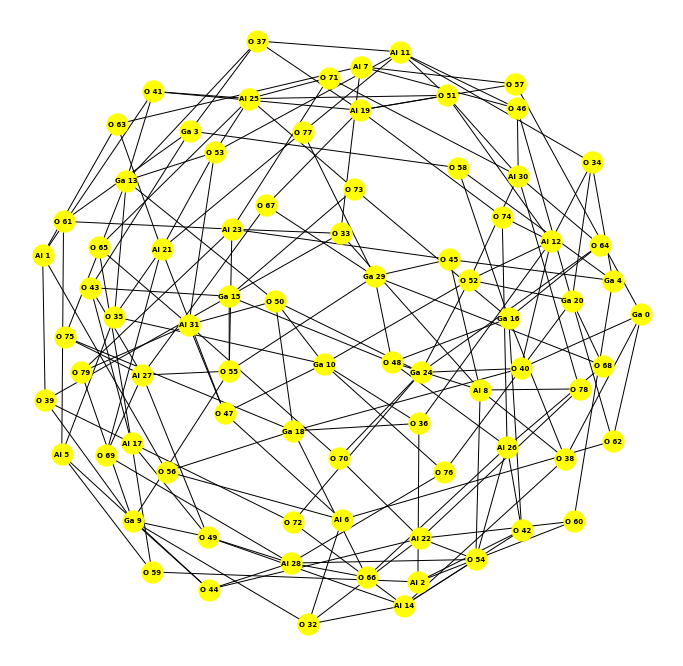

In [111]:
plt.figure(figsize=(12,12)) 
nx.draw_networkx_labels(G, pos=nx.kamada_kawai_layout(G), font_size=7, font_color="black", font_weight="bold")
nx.draw_kamada_kawai(G, with_labels=False, node_size=450,node_color='yellow')
# Nice!
plt.savefig("id1rsn0graph.png",dpi=300)

In [ ]:
# The last step is to calculate the amount of neighbors of each atom:
def gethood(G,)